# Exploratory Data Analysis

This notebook contains the exploratory data analysis (EDA) for the three datasets provided. These have been already processed in the ETL stage. This analysis aims to visualize the given data and gain further understanding of it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import pyarrow as pa
import pyarrow.parquet as pq
import warnings
warnings.filterwarnings("ignore")

## 'steam_games'

In [2]:
df_games = pd.read_csv('../data/processed/steam_games_processed.csv')
df_games.head()

,genres,title,release_year,price,id,developer
0,Action,Lost Summoner Kitty,2018,4.99,761140.0,Kotoshiro
1,Casual,Lost Summoner Kitty,2018,4.99,761140.0,Kotoshiro
2,Indie,Lost Summoner Kitty,2018,4.99,761140.0,Kotoshiro
3,Simulation,Lost Summoner Kitty,2018,4.99,761140.0,Kotoshiro
4,Strategy,Lost Summoner Kitty,2018,4.99,761140.0,Kotoshiro


In [3]:
df_games.dtypes

genres           object
title            object
release_year      int64
price           float64
id              float64
developer        object
dtype: object

In [4]:
df_games.describe(include='all')

,genres,title,release_year,price,id,developer
count,67931,67931,67931.000000,67931.000000,6.793100e+04,67931
unique,22,27404,NaN,NaN,NaN,10591
top,Indie,Rebons,NaN,NaN,NaN,Ubisoft - San Francisco
freq,15069,10,NaN,NaN,NaN,2514
mean,NaN,NaN,2015.252727,8.834540,4.639225e+05,NaN
std,NaN,NaN,2.793146,16.036567,1.746101e+05,NaN
min,NaN,NaN,1983.000000,0.000000,1.000000e+01,NaN
25%,NaN,NaN,2015.000000,2.990000,3.425350e+05,NaN
50%,NaN,NaN,2016.000000,4.990000,4.612100e+05,NaN
75%,NaN,NaN,2017.000000,9.990000,6.004400e+05,NaN


#### genre

Text(0.5, 1.0, 'Count of Distinct Titles by Genre')

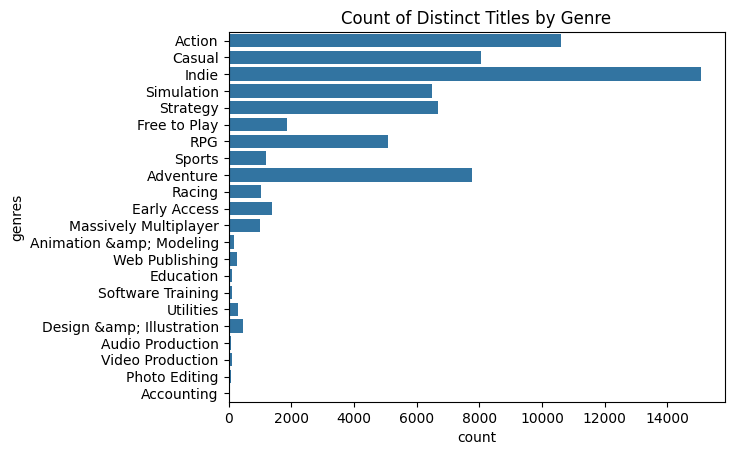

In [5]:
# Create the horizontal bar chart
sns.countplot(y='genres', data=df_games, orient='h')

# Add a title and labels
plt.title('Count of Distinct Titles by Genre')

#### developer

Text(0.5, 1.0, 'Top 10 Developers')

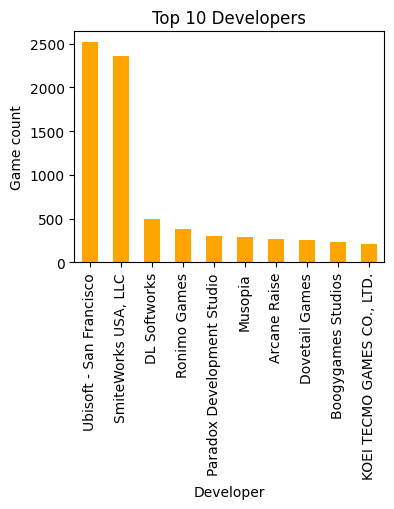

In [6]:
# count games by developer
count_developer = df_games['developer'].value_counts()

plt.figure(figsize=(4,3))
count_developer[:10].plot(kind='bar', color='orange')
plt.xlabel('Developer') ; plt.ylabel('Game count') ; plt.title('Top 10 Developers')

#### release_year

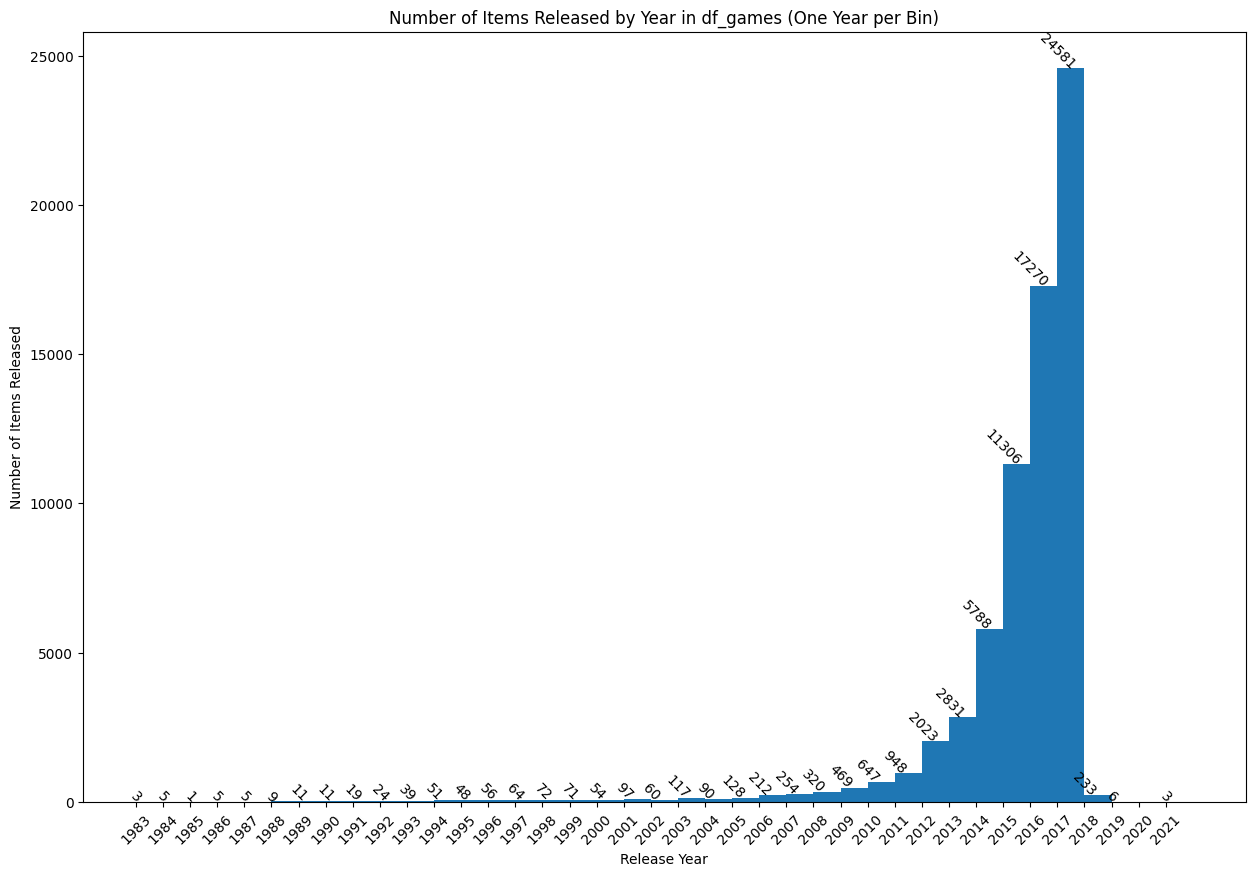

In [7]:
# Calculate the minimum and maximum years (optional, useful for setting bin range)
min_year = df_games['release_year'].min()
max_year = df_games['release_year'].max()

plt.figure(figsize=(15,10))

# Create a histogram with one bin for each year (adjust range if needed)
plt.hist(df_games['release_year'], bins=max_year - min_year + 1, range=(min_year, max_year + 1))
plt.xlabel('Release Year')
plt.ylabel('Number of Items Released')
plt.title('Number of Items Released by Year in df_games (One Year per Bin)')
plt.xticks(range(min_year, max_year + 1), rotation=45, ha = 'center')  # Set tick marks for each year
for i, v in enumerate(df_games['release_year'].value_counts()):
    plt.text(df_games['release_year'].value_counts().index[i], v, str(v), rotation=315, ha = 'center' )

plt.show()

#### price

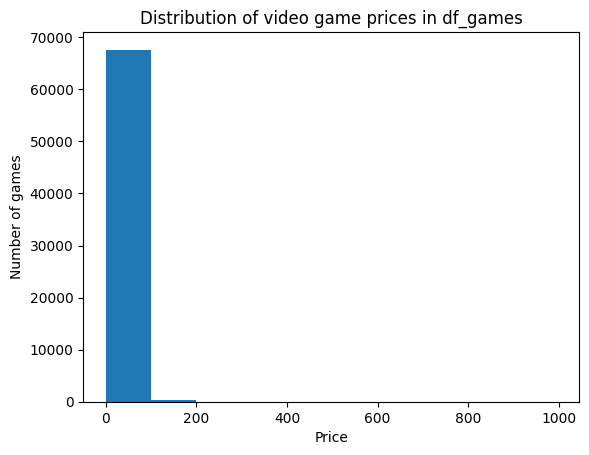

In [8]:
# Explore the distribution of the price
plt.hist(df_games['price'])
plt.xlabel('Price')
plt.ylabel('Number of games')
plt.title('Distribution of video game prices in df_games')
plt.show()

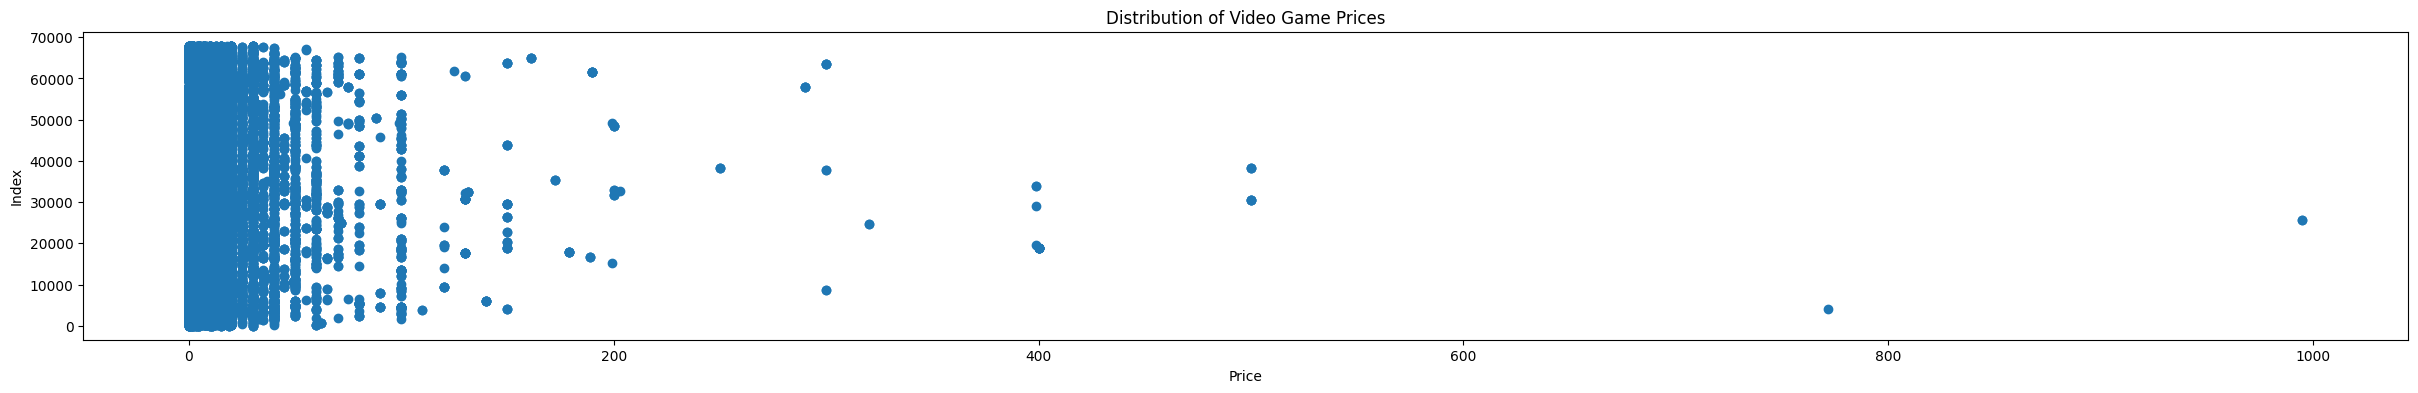

In [9]:

plt.figure(figsize=(30,4))
plt.scatter(df_games['price'], df_games.index)  # Price on x-axis, index on y-axis
plt.xlabel('Price')
plt.ylabel('Index')
plt.title('Distribution of Video Game Prices')
plt.show()


## user_reviews

In [10]:
df_reviews = pd.read_csv('../data/processed/user_reviews_processed-fe.csv', engine = 'python')
df_reviews.head()

,user_id,posted,item_id,recommend,review,sentiment_category
0,76561197970982479,2011-11-05,1250.0,True,Simple yet with great replayability. In my opi...,2
1,76561197970982479,2011-07-15,22200.0,True,It's unique and worth a playthrough.,2
2,76561197970982479,2011-04-21,43110.0,True,Great atmosphere. The gunplay can be a bit chu...,2
3,js41637,2014-06-24,251610.0,True,I know what you think when you see this title ...,2
4,js41637,2013-09-08,227300.0,True,For a simple (it's actually not all that simpl...,2


In [11]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49077 entries, 0 to 49076
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             49077 non-null  object 
 1   posted              49070 non-null  object 
 2   item_id             49070 non-null  float64
 3   recommend           49070 non-null  object 
 4   review              49043 non-null  object 
 5   sentiment_category  49077 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 2.2+ MB


#### user_id

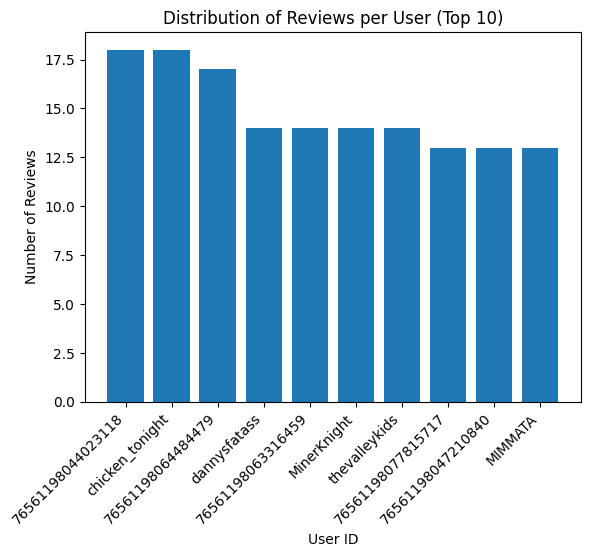

In [12]:
# Get the top 10 most frequent reviewers
top_reviewers = df_reviews['user_id'].value_counts().head(10)

# Create a bar chart
plt.bar(top_reviewers.index, top_reviewers.values)
plt.xlabel('User ID')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Reviews per User (Top 10)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

#### recommend

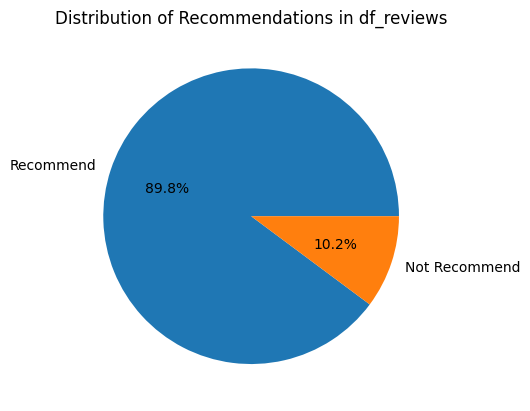

In [13]:
# Count True and False values
true_count = df_reviews['recommend'].sum()
false_count = len(df_reviews) - true_count

# Labels and data for the pie chart
labels = ['Recommend', 'Not Recommend']
data = [true_count, false_count]

# Create the pie chart
plt.pie(data, labels=labels, autopct="%1.1f%%")  # Display percentages with one decimal place
plt.title('Distribution of Recommendations in df_reviews')
plt.show()

#### sentiment category

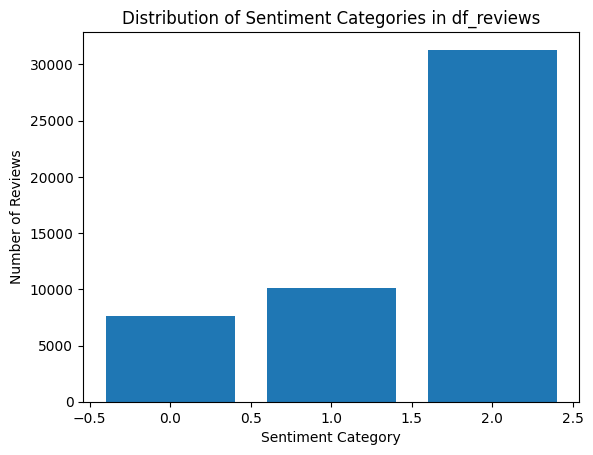

In [14]:
# Get the sentiment category counts
sentiment_counts = df_reviews['sentiment_category'].value_counts()

# Create the bar chart
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Sentiment Categories in df_reviews')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()


#### posted

In [15]:
df_reviews['posted'].value_counts().head()

posted
2014-06-21    224
2014-06-20    193
2014-06-23    173
2014-06-27    171
2013-12-26    171
Name: count, dtype: int64

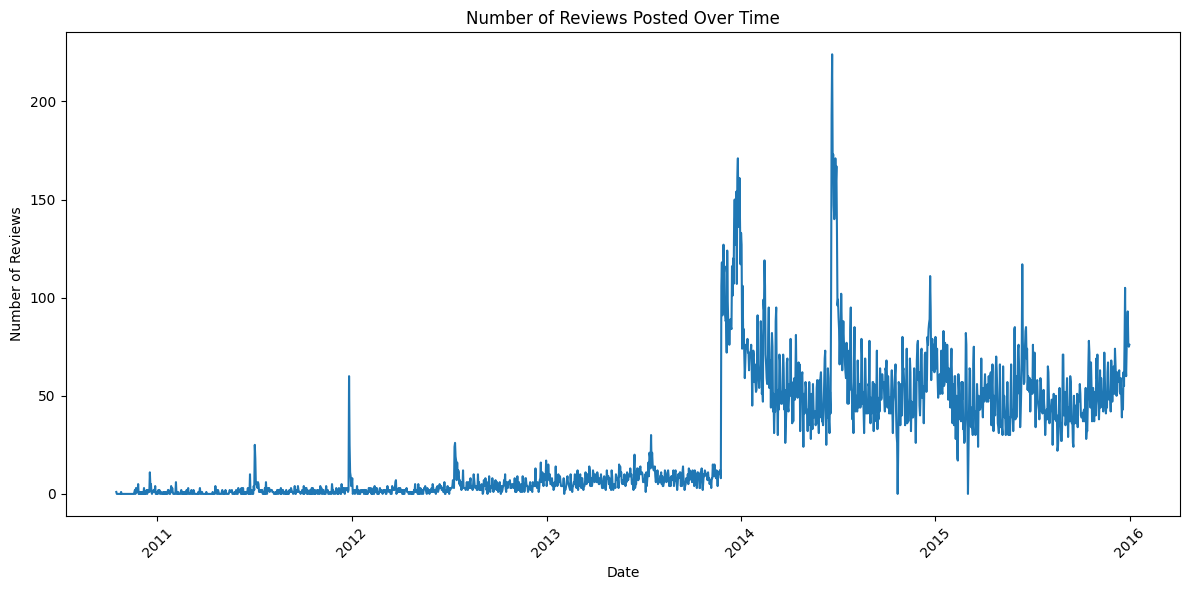

In [16]:
# Convert 'posted' to datetime format (if not already done)
if not pd.api.types.is_datetime64_dtype(df_reviews['posted']):
    df_reviews['posted'] = pd.to_datetime(df_reviews['posted'])

# Set the date range using min and max from 'posted'
date_range = pd.date_range(start=df_reviews['posted'].min(), end=df_reviews['posted'].max())

# Ensure 'posted' is datetime and set it as the index
df_reviews = df_reviews.set_index(pd.to_datetime(df_reviews['posted']))

# Resample daily and count occurrences
daily_reviews_count = df_reviews.resample('D')['posted'].count()

# Forward fill missing values to create a continuous series
daily_reviews_count = daily_reviews_count.fillna(method='ffill')

# Create the timeline plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(date_range, daily_reviews_count)
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews Posted Over Time')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for readability
plt.tight_layout()  # Adjust spacing between elements

# Display the plot
plt.show()



## user_items

In [17]:
df_items = pd.read_csv('../data/processed/users_items_processed.csv', engine = 'python')
df_items.head()

,user_id,items_count,item_id,item_name,playtime_forever
0,76561197970982479,277,10,Counter-Strike,6.0
1,76561197970982479,277,20,Team Fortress Classic,0.0
2,76561197970982479,277,30,Day of Defeat,7.0
3,76561197970982479,277,40,Deathmatch Classic,0.0
4,76561197970982479,277,50,Half-Life: Opposing Force,0.0


In [18]:
df_items.describe(include='all')

,user_id,items_count,item_id,item_name,playtime_forever
count,5094092,5.094092e+06,5.094092e+06,5094092,5.094092e+06
unique,70912,NaN,NaN,10947,NaN
top,phrostb,NaN,NaN,Dota 2 Test,NaN
freq,7762,NaN,NaN,49136,NaN
mean,NaN,3.157328e+02,1.783916e+05,NaN,9.905144e+02
std,NaN,6.969081e+02,1.318515e+05,NaN,5.414110e+03
min,NaN,1.000000e+00,1.000000e+01,NaN,0.000000e+00
25%,NaN,7.100000e+01,3.445000e+04,NaN,0.000000e+00
50%,NaN,1.370000e+02,2.144200e+05,NaN,3.400000e+01
75%,NaN,2.750000e+02,2.664300e+05,NaN,3.550000e+02


In [19]:
users_with_most_items = df_items.groupby('user_id')['items_count'].max().reset_index().sort_values(by='items_count', ascending=False)
print(users_with_most_items.head(10))


                 user_id  items_count
65868            phrostb         7762
69170       thugnificent         6700
57814             chidvd         6410
65886             piepai         6132
64104     mayshowganmore         5027
46482       DeEggMeister         4576
24852  76561198070585472         4456
53567         Steamified         4432
66509          rawrvixen         4212
59005          djnemonic         3876


In [20]:
avg_playtime_per_user = df_items.groupby('user_id')['playtime_forever'].mean().reset_index().sort_values(by='playtime_forever', ascending=False)
print(avg_playtime_per_user.head(10))



                 user_id  playtime_forever
27697  76561198074009738     216412.000000
20243  76561198064540648     148678.000000
62988            kryster     138712.000000
4571   76561198014635088     129959.000000
42690  76561198122336761     124215.000000
15029  76561198054840158     118493.666667
44052  76561198287280974      97048.000000
67215            sbeghen      94189.000000
34941  76561198086538898      86539.000000
68325          subhamcr7      80449.000000


In [21]:
most_played_games = df_items.groupby('item_name')['playtime_forever'].mean().reset_index().sort_values(by='playtime_forever', ascending=False)
print(most_played_games.head(10))

                                              item_name  playtime_forever
6058                                     MovieWriterPro      38283.000000
5620                                   Major\Minor - EA      33759.000000
2102                                      Cosplay Maker      23717.000000
1690                           Casey Powell Lacrosse 16      18798.750000
2117                   Counter-Strike: Global Offensive      17904.003023
7650  Root Double -Before Crime * After Days- Xtend ...      15815.000000
3666                              Football Manager 2015      15695.526646
3989                               Getsuei Gakuen -kou-      15648.500000
3657                              Football Manager 2012      13923.195876
2035                                          Con Amore      13500.000000


In [22]:
most_popular_items = df_items['item_name'].value_counts().reset_index(name='counts').sort_values(by='counts', ascending=False)
print(most_popular_items.head(10))


                          item_name  counts
0                       Dota 2 Test   49136
1  Counter-Strike: Global Offensive   43332
2                       Garry's Mod   42849
3                          Unturned   38278
4                Left 4 Dead 2 Beta   36661
5                     Left 4 Dead 2   36661
6                          Terraria   28934
7                          Warframe   25516
8                          Portal 2   24206
9            Counter-Strike: Source   23952


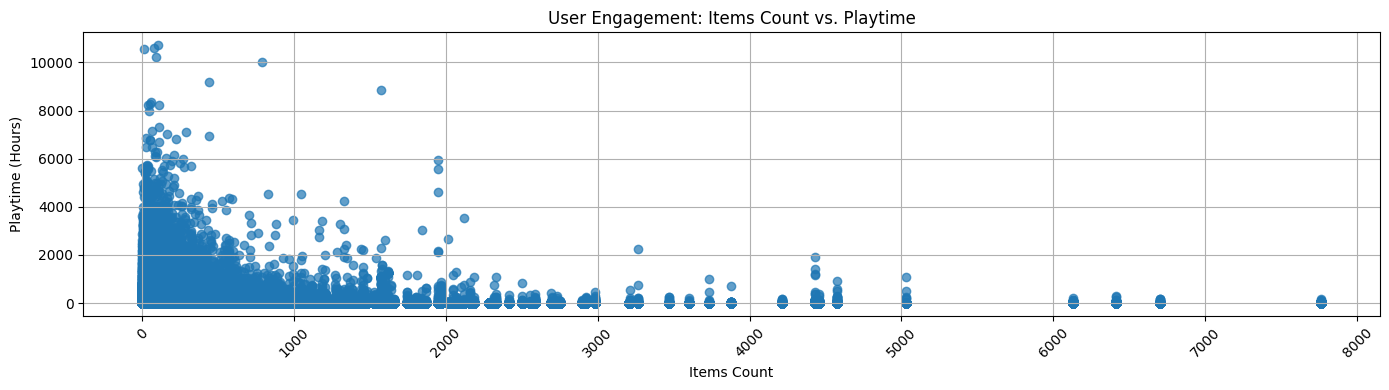

In [23]:
# Convert playtime to hours
df_items['playtime_hours'] = df_items['playtime_forever'] / 60

# Create a scatter plot using a numerical representation of user IDs (if applicable)

plt.figure(figsize=(14, 4))
plt.scatter(x=df_items['items_count'], y=df_items['playtime_hours'], cmap='viridis', alpha=0.7)

# Add labels and title
plt.xlabel('Items Count')
plt.ylabel('Playtime (Hours)')  # Update label to reflect hours
plt.title('User Engagement: Items Count vs. Playtime')  # Update title

# Add a colorbar (optional)
# plt.colorbar(label='User ID')

# Rotate x-axis labels if many data points
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


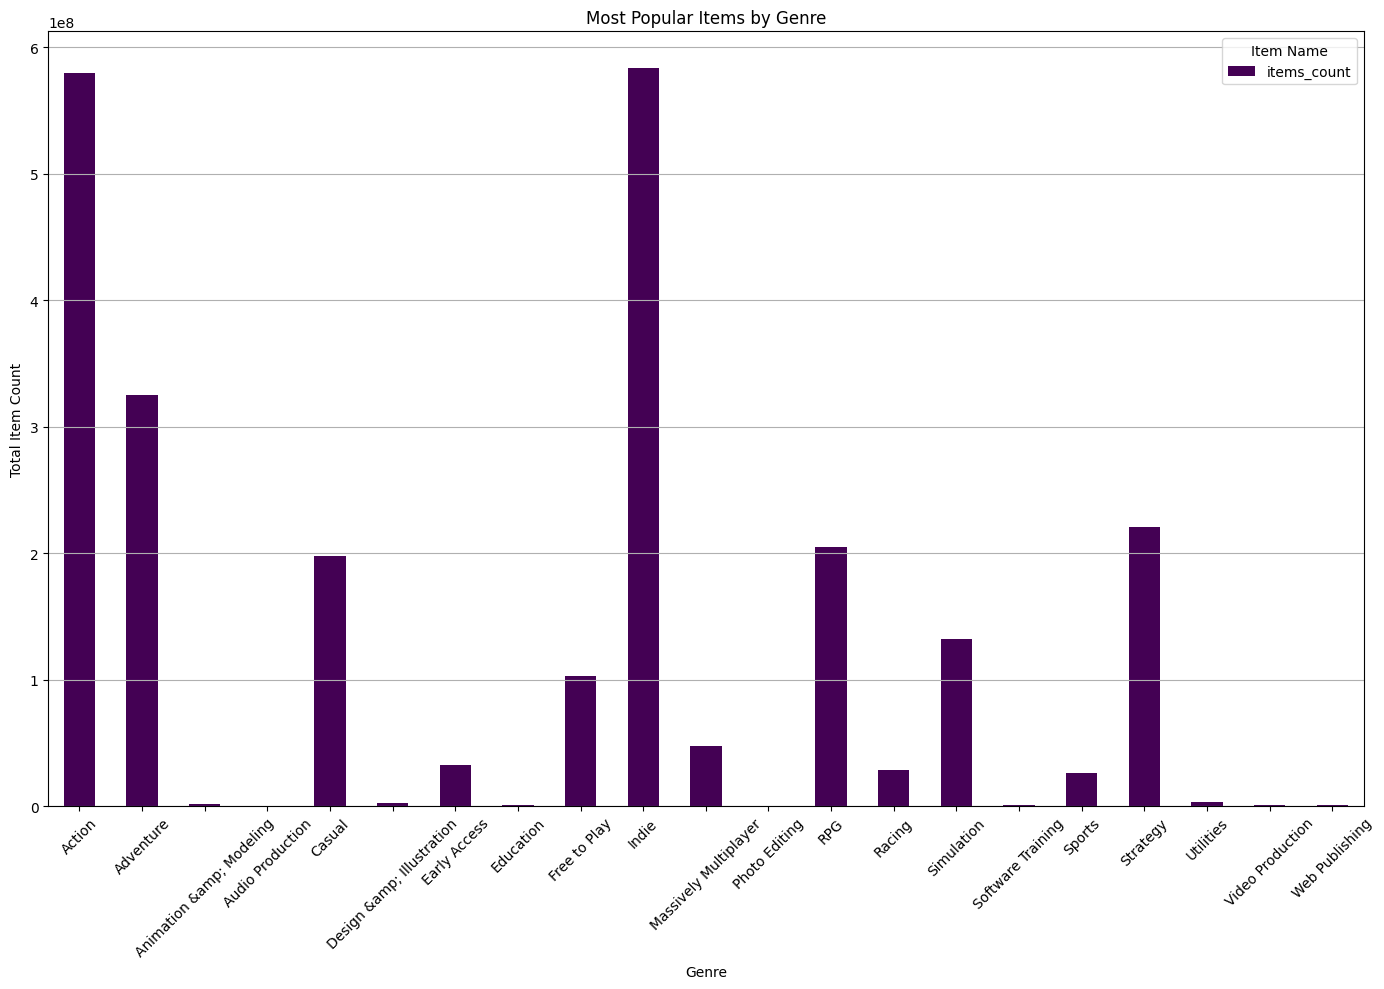

In [24]:
# Merge the DataFrames based on a common column (e.g., 'title')
df_merged = df_items.merge(df_games, left_on='item_name', right_on='title')

# Group by genre and sum counts
category_counts = df_merged.groupby('genres')['items_count'].sum()

plt.figure(figsize=(14, 10))
# Create the stacked bar chart
category_counts.plot(kind='bar', stacked=True, colormap='viridis')  # Adjust colormap as needed


# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Total Item Count')
plt.title('Most Popular Items by Genre')

# Show legend (optional)
plt.legend(title='Item Name')

# Rotate x-axis labels if many categories
plt.xticks(rotation=45)

# Show the plot
plt.grid(axis='y')  # Add grid lines for better readability
plt.tight_layout()
plt.show()


## choose variables for recommendation model

### def recommendation_user

First, let's create a new column 'rating' containing a scoring system  for each row. The rating will be based on  the values in columns 'sentiment_category' and 'recommend'.

In [25]:
def calculate_rating(row):
  recommend = row['recommend']
  sentiment = row['sentiment_category']

  # Optimized rating calculation using dictionary lookup
  rating_mapping = {
      (1, False): 0,  # Negative and False
      (1, True): 1,   # Negative and True
      (0, False): 2,  # Neutral and False
      (0, True): 3,   # Neutral and True
      (2, False): 4,  # Positive and False
      (2, True): 5    # Positive and True
  }

  try:
    return rating_mapping[(sentiment, recommend)]
  except KeyError:
    return pd.NA  # Assign missing value indicator

# Create a new column named 'rating' and apply the function
df_reviews['rating'] = df_reviews.apply(calculate_rating, axis=1)

In [26]:
df_reviews = df_reviews.dropna()

In [27]:
# change dtypes of column to int
df_reviews['rating'] = df_reviews['rating'].astype(int)

In [28]:
df_reviews.head()

,user_id,posted,item_id,recommend,review,sentiment_category,rating
posted,,,,,,,
2011-11-05,76561197970982479,2011-11-05,1250.0,True,Simple yet with great replayability. In my opi...,2,5
2011-07-15,76561197970982479,2011-07-15,22200.0,True,It's unique and worth a playthrough.,2,5
2011-04-21,76561197970982479,2011-04-21,43110.0,True,Great atmosphere. The gunplay can be a bit chu...,2,5
2014-06-24,js41637,2014-06-24,251610.0,True,I know what you think when you see this title ...,2,5
2013-09-08,js41637,2013-09-08,227300.0,True,For a simple (it's actually not all that simpl...,2,5


In [29]:
df_games.dtypes

genres           object
title            object
release_year      int64
price           float64
id              float64
developer        object
dtype: object

In [30]:
df1 = df_reviews[['user_id', 'item_id', 'rating']]
df1.head(3)

,user_id,item_id,rating
posted,,,
2011-11-05,76561197970982479,1250.0,5
2011-07-15,76561197970982479,22200.0,5
2011-04-21,76561197970982479,43110.0,5


In [31]:
df2 = df_items[['item_id', 'item_name']]
# Delete duplicates
df2 = df2.drop_duplicates()
# Cantidad de juegos
print(f'There is {len(df2)} amount of games')
df2.head(2)

There is 10978 amount of games


,item_id,item_name
0,10,Counter-Strike
1,20,Team Fortress Classic


In [32]:
df = df1.merge(df2, left_on="item_id", right_on="item_id", how='left')
df

,user_id,item_id,rating,item_name
0,76561197970982479,1250.0,5,Killing Floor
1,76561197970982479,22200.0,5,Zeno Clash
2,76561197970982479,43110.0,5,Metro 2033
3,js41637,251610.0,5,Barbie™ Dreamhouse Party™
4,js41637,227300.0,5,Euro Truck Simulator 2
...,...,...,...,...
49038,llDracuwulf,730.0,1,Counter-Strike: Global Offensive
49039,76561198223837952,253980.0,5,Enclave
49040,76561198229845636,730.0,3,Counter-Strike: Global Offensive
49041,76561198232478272,730.0,5,Counter-Strike: Global Offensive


In [33]:
df.dtypes

user_id       object
item_id      float64
rating         int64
item_name     object
dtype: object

In [34]:
# change dtypes of column to int
df['item_id'] = df['item_id'].astype(int)

In [35]:
item_id_distinct = df['item_id'].nunique()
item_name_distinct = df['item_name'].dropna().nunique()  # Count distinct after dropping NaN
nameless_items = item_id_distinct - item_name_distinct
null_count = df['item_name'].isnull().sum()

# Print the results
print(f'There are {nameless_items} items without names. Using {null_count} rows')


There are 257 items without names. Using 5765 rows


The results above show that 5765 games have no name, but are nonetheless reviewed. We fill those missing values with 'NaN'

In [36]:

# Replace missing values with "NaN" in column: 'item_name'
df = df.fillna({'item_name': "NaN"})

In [37]:
# drop missing values
df= df.dropna()

We drop column 'item_id' as the recommendation model only needs to provide the item's name

In [38]:
df = df.drop('item_id', axis=1)

In [39]:
df.head()

,user_id,rating,item_name
0,76561197970982479,5,Killing Floor
1,76561197970982479,5,Zeno Clash
2,76561197970982479,5,Metro 2033
3,js41637,5,Barbie™ Dreamhouse Party™
4,js41637,5,Euro Truck Simulator 2


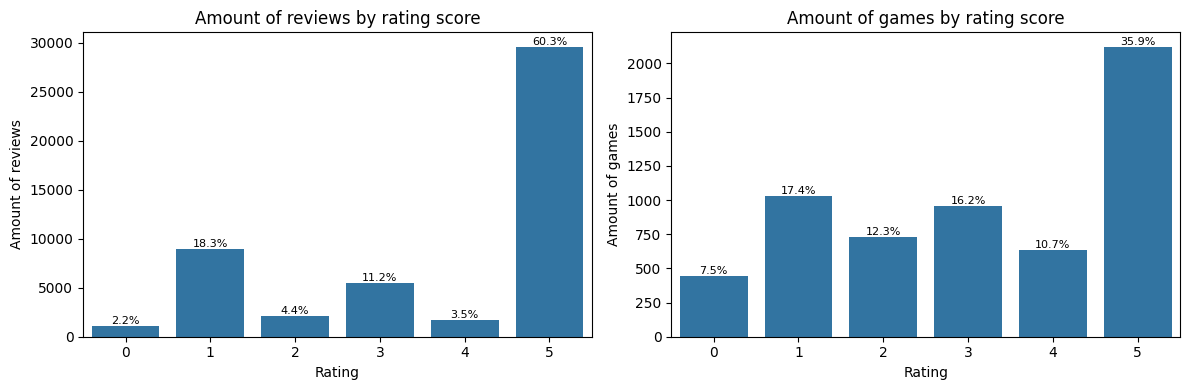

In [40]:

# Group ratings by score
ratings_count = df['rating'].value_counts().reset_index()
ratings_count.columns = ['rating', 'count']

# Group distinct games by rating scores
unique_games_per_rating = df.groupby('rating')['item_name'].nunique().reset_index()

# Calculate total ratings and total unique games
total_ratings = df['rating'].count()
total_unique_games = df['item_name'].nunique()

# Calculate total count for each bar chart
total_ratings_per_bar = ratings_count['count'].sum()
total_unique_games_per_bar = unique_games_per_rating['item_name'].sum()

# Define a function to format percentage labels
def format_percentage(value, total):
    return f"{value / total * 100:.1f}%"

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# First subplot: ratings count
sns.barplot(data=ratings_count, x='rating', y='count', ax=axes[0])
for bar in axes[0].containers[0]:
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                 format_percentage(bar.get_height(), total_ratings_per_bar), 
                 ha='center', va='bottom', fontsize=8)
axes[0].set_title('Amount of reviews by rating score')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Amount of reviews')

# Second subplot: unique games per rating
sns.barplot(data=unique_games_per_rating, x='rating', y='item_name', ax=axes[1])
for bar in axes[1].containers[0]:
    axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                 format_percentage(bar.get_height(), total_unique_games_per_bar), 
                 ha='center', va='bottom', fontsize=8)
axes[1].set_title('Amount of games by rating score')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Amount of games')

# Adjust and show graphic
plt.tight_layout()
plt.show()


## def game_recommend

In [41]:
df_item_rec = pd.read_parquet('../data/df_games.parquet')
df_item_rec

,genres,title,release_year,price,id,developer
0,Action,Lost Summoner Kitty,2018,4.99,761140.0,Kotoshiro
1,Casual,Lost Summoner Kitty,2018,4.99,761140.0,Kotoshiro
2,Indie,Lost Summoner Kitty,2018,4.99,761140.0,Kotoshiro
3,Simulation,Lost Summoner Kitty,2018,4.99,761140.0,Kotoshiro
4,Strategy,Lost Summoner Kitty,2018,4.99,761140.0,Kotoshiro
...,...,...,...,...,...,...
67926,Indie,Russian Roads,2018,1.99,610660.0,Laush Dmitriy Sergeevich
67927,Racing,Russian Roads,2018,1.99,610660.0,Laush Dmitriy Sergeevich
67928,Simulation,Russian Roads,2018,1.99,610660.0,Laush Dmitriy Sergeevich
67929,Casual,EXIT 2 - Directions,2017,4.99,658870.0,"xropi,stev3ns"


In [42]:
df_item_rec = df_item_rec[['id', 'title', 'genres']]
df_item_rec

,id,title,genres
0,761140.0,Lost Summoner Kitty,Action
1,761140.0,Lost Summoner Kitty,Casual
2,761140.0,Lost Summoner Kitty,Indie
3,761140.0,Lost Summoner Kitty,Simulation
4,761140.0,Lost Summoner Kitty,Strategy
...,...,...,...
67926,610660.0,Russian Roads,Indie
67927,610660.0,Russian Roads,Racing
67928,610660.0,Russian Roads,Simulation
67929,658870.0,EXIT 2 - Directions,Casual


In [43]:
df_item_rec = df_item_rec.groupby('id').first()  
df_item_rec           

,title,genres
id,,
10.0,Counter-Strike,Action
20.0,Team Fortress Classic,Action
30.0,Day of Defeat,Action
40.0,Deathmatch Classic,Action
50.0,Half-Life: Opposing Force,Action
...,...,...
901805.0,Saints Row: The Third Season Pass DLC Pack,Action
2028055.0,Tom Clancy's Ghost Recon Future Soldier - Seas...,Action
2028056.0,Worms Revolution Season Pass,Strategy


In [47]:
df_item_rec.dtypes

title     object
genres    object
dtype: object

Text(0.5, 1.0, 'Count of Distinct Titles by Genre')

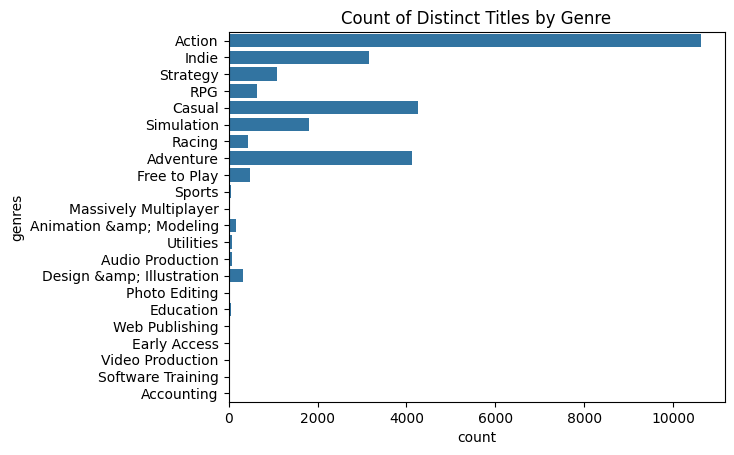

In [52]:
# Create the horizontal bar chart
sns.countplot(y='genres', data=df_item_rec, orient='h')

# Add a title and labels
plt.title('Count of Distinct Titles by Genre')

#### Load data

In [44]:
df.to_csv('../data/processed/df_recommendation.csv', index=False, encoding='utf-8')

In [45]:
df_item_rec.to_csv('../data/processed/df_item_rec.csv', index=False, encoding='utf-8')

In [46]:
pq.write_table(pa.Table.from_pandas(df_item_rec), '../data/processed/df_item_rec.parquet')